In [1]:
import warnings
#warnings.filterwarnings(action='once')
warnings.filterwarnings(action='ignore')

In [2]:
%matplotlib inline

import matplotlib
matplotlib.use('Agg')

import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np 

In [3]:
df = pd.read_csv("vehicles.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
Current fleet    249 non-null int64
New Fleet        79 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB
None


,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0


In [4]:
dfc = df.columns.copy()

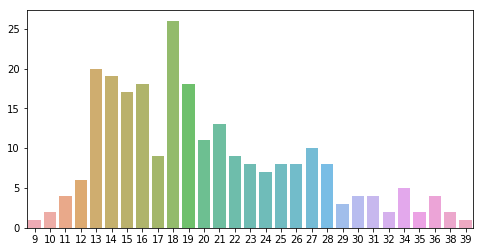

In [5]:
#sns_plot = sns.lmplot(df.columns[0], df.columns[1], data=df, fit_reg=False)

is_dup = df['Current fleet'].value_counts()
#sns_plot = sns.lmplot(is_dup.index, df.columns['Current fleet'], data=df, fit_reg=False)
plt.figure(figsize=(8,4))
sns.barplot(is_dup.index, is_dup.values, alpha=0.8)
plt.show()

#sns_plot = sns.lmplot(dfc.index.values, dfc.columns[0], data=dfc, fit_reg=False)
#sns_plot.axes[0,0].set_ylim(0,)
#sns_plot.axes[0,0].set_xlim(0,)

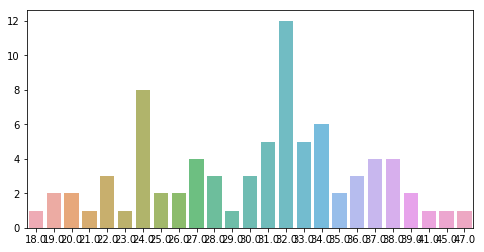

In [6]:
is_dup = df['New Fleet'].value_counts()
#sns_plot = sns.lmplot(is_dup.index, df.columns['Current fleet'], data=df, fit_reg=False)
plt.figure(figsize=(8,4))
sns.barplot(is_dup.index, is_dup.values, alpha=0.8)
plt.show()

In [7]:
def bootstrap(statistic_func, iterations, data):
    vals = []
    samples = np.random.choice(data, replace=True, size=[iterations, len(data)])
    for sample in samples:
        sta = statistic_func(sample)
        vals.append(sta)
    b = np.array(vals)
    # print b
    lower, upper = np.percentile(b, [2.5, 97.5])
    return np.mean(b), lower, upper

In [10]:
boots = []
samples = 100000
df = pd.read_csv('./vehicles.csv')
fleet_current = df.values.T[0]
fleet_proposed = df.dropna().values.T[1]

# Find the upper and lower bound of the standard deviation in the current fleet.
# Current fleet.
boot = bootstrap(np.std, samples, fleet_current)
print("::::: Standard Deviation: Current Fleet")
print("STD : %f" % np.std(fleet_current))
print("STD Mean: %f" % boot[0])
print("STD Lower Bound : %f" % boot[1])
print("STD Upper Bound: %f" % boot[2])

# Proposed fleet.
boot = bootstrap(np.std, samples, fleet_proposed)
print("\n")
print("::::: Standard Deviation: Proposed Fleet")
print("STD : %f" % np.std(fleet_proposed))
print("STD Mean: %f" % boot[0])
print("STD Lower Bound : %f" % boot[1])
print("STD Upper Bound: %f" % boot[2])

::::: Standard Deviation: Current Fleet
STD : 6.401805
STD Mean: 6.383341
STD Lower Bound : 5.809777
STD Upper Bound: 6.945456


::::: Standard Deviation: Proposed Fleet
STD : 6.068931
STD Mean: 6.011220
STD Lower Bound : 5.137868
STD Upper Bound: 6.904766


In [11]:
def mad(arr):
    """ Median Absolute Deviation: a "Robust" version of standard deviation.
        Indices variabililty of the sample.
        https://en.wikipedia.org/wiki/Median_absolute_deviation 
        http://stackoverflow.com/questions/8930370/where-can-i-find-mad-mean-absolute-deviation-in-scipy
    """
    arr = np.ma.array(arr).compressed() # should be faster to not use masked arrays.
    med = np.median(arr)
    return np.median(np.abs(arr - med))

In [19]:
# READ DATA
df = pd.read_csv('./vehicles.csv')

# TRANSPOSE DATA
data_current_fleet = df.values.T[0]
data_proposed_fleet = df.dropna().values.T[1]

# PRINT SUMMARY STATISTICS
print("::::: Summary Statistics: Current Fleet")
print((("Mean: %f")%(np.mean(data_current_fleet))))
print((("Median: %f")%(np.median(data_current_fleet))))
print((("Var: %f")%(np.var(data_current_fleet))))
print((("std: %f")%(np.std(data_current_fleet))))
print((("MAD: %f")%(mad(data_current_fleet))))

print("\n")
print("::::: Summary Statistics: Proposed Fleet")
print((("Mean: %f")%(np.mean(data_proposed_fleet))))
print((("Median: %f")%(np.median(data_proposed_fleet))))
print((("Var: %f")%(np.var(data_proposed_fleet))))
print((("std: %f")%(np.std(data_proposed_fleet))))
print((("MAD: %f")%(mad(data_proposed_fleet))))

::::: Summary Statistics: Current Fleet
Mean: 20.144578
Median: 19.000000
Var: 40.983113
std: 6.401805
MAD: 4.000000


::::: Summary Statistics: Proposed Fleet
Mean: 30.481013
Median: 32.000000
Var: 36.831918
std: 6.068931
MAD: 4.000000


# HISTOGRAMS

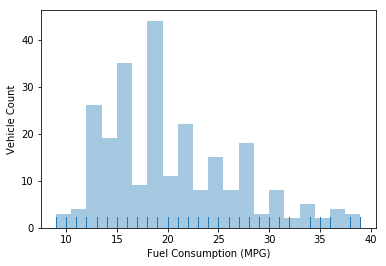

In [17]:
# CURRENT FLEET
plt.clf()
sns_plot2 = sns.distplot(data_current_fleet, bins=20, kde=False, rug=True).get_figure()
axes = plt.gca()
axes.set_xlabel('Fuel Consumption (MPG)')
axes.set_ylabel('Vehicle Count')
sns_plot2.savefig("histogram_vehicles_current_fleet.png",bbox_inches='tight')
sns_plot2.savefig("histogram_vehicles_current_fleet.pdf",bbox_inches='tight')

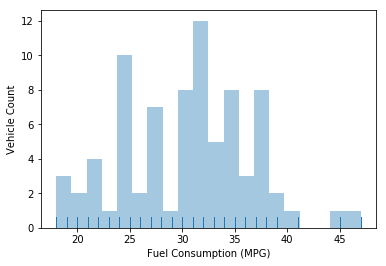

In [18]:
# PROPOSED FLEET
plt.clf()
sns_plot2 = sns.distplot(data_proposed_fleet, bins=20, kde=False, rug=True).get_figure()
axes = plt.gca()
axes.set_xlabel('Fuel Consumption (MPG)')
axes.set_ylabel('Vehicle Count')
sns_plot2.savefig("histogram_vehicles_proposed_fleet.png",bbox_inches='tight')
sns_plot2.savefig("histogram_vehicles_proposed_fleet.pdf",bbox_inches='tight')